## Boston波士顿房价数据集的简介:
 
    该数据集包含美国人口普查局收集的美国马萨诸塞州波士顿住房价格的有关信息, 数据集很小，只有506个案例。

数据集都有以下14个属性:

CRIM--城镇人均犯罪率                                                              ------【城镇人均犯罪率】

ZN - 占地面积超过25,000平方英尺的住宅用地比例。               ------【住宅用地所占比例】

INDUS - 每个城镇非零售业务的比例。                                      ------【城镇中非商业用地占比例】

CHAS - Charles River虚拟变量（如果是河道，则为1;否则为0  ------【查尔斯河虚拟变量，用于回归分析】

NOX - 一氧化氮浓度（每千万份）                                             ------【环保指标】

RM - 每间住宅的平均房间数                                                      ------【每栋住宅房间数】

AGE - 1940年以前建造的自住单位比例                                     ------【1940年以前建造的自住单位比例 】

DIS -波士顿的五个就业中心加权距离                                        ------【与波士顿的五个就业中心加权距离】

RAD - 径向高速公路的可达性指数                                             ------【距离高速公路的便利指数】

TAX - 每10,000美元的全额物业税率                                          ------【每一万美元的不动产税率】

PTRATIO - 城镇的学生与教师比例                                             ------【城镇中教师学生比例】

B - 1000（Bk - 0.63）^ 2其中Bk是城镇黑人的比例                   ------【城镇中黑人比例】

LSTAT - 人口状况下降％                                                            ------【房东属于低等收入阶层比例】

MEDV - 自有住房的中位数报价, 单位1000美元                         ------【自住房屋房价中位数】
 


异常的数据所在行:

         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
380  88.9762  0.0   18.1     0  0.671  6.968   91.9  1.4165   24  666.0   
398  38.3518  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666.0   
404  41.5292  0.0   18.1     0  0.693  5.531   85.4  1.6074   24  666.0   
405  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666.0   
410  51.1358  0.0   18.1     0  0.597  5.757  100.0  1.4130   24  666.0   
414  45.7461  0.0   18.1     0  0.693  4.519  100.0  1.6582   24  666.0   
418  73.5341  0.0   18.1     0  0.679  5.957  100.0  1.8026   24  666.0   

     PTRATIO       B  LSTAT  MEDV  
380     20.2  396.90  17.21  10.4  
398     20.2  396.90  30.59   5.0  
404     20.2  329.46  27.38   8.5  
405     20.2  384.97  22.98   5.0  
410     20.2    2.60  10.11  15.0  
414     20.2   88.27  36.98   7.0  
418     20.2   16.45  20.62   8.8  


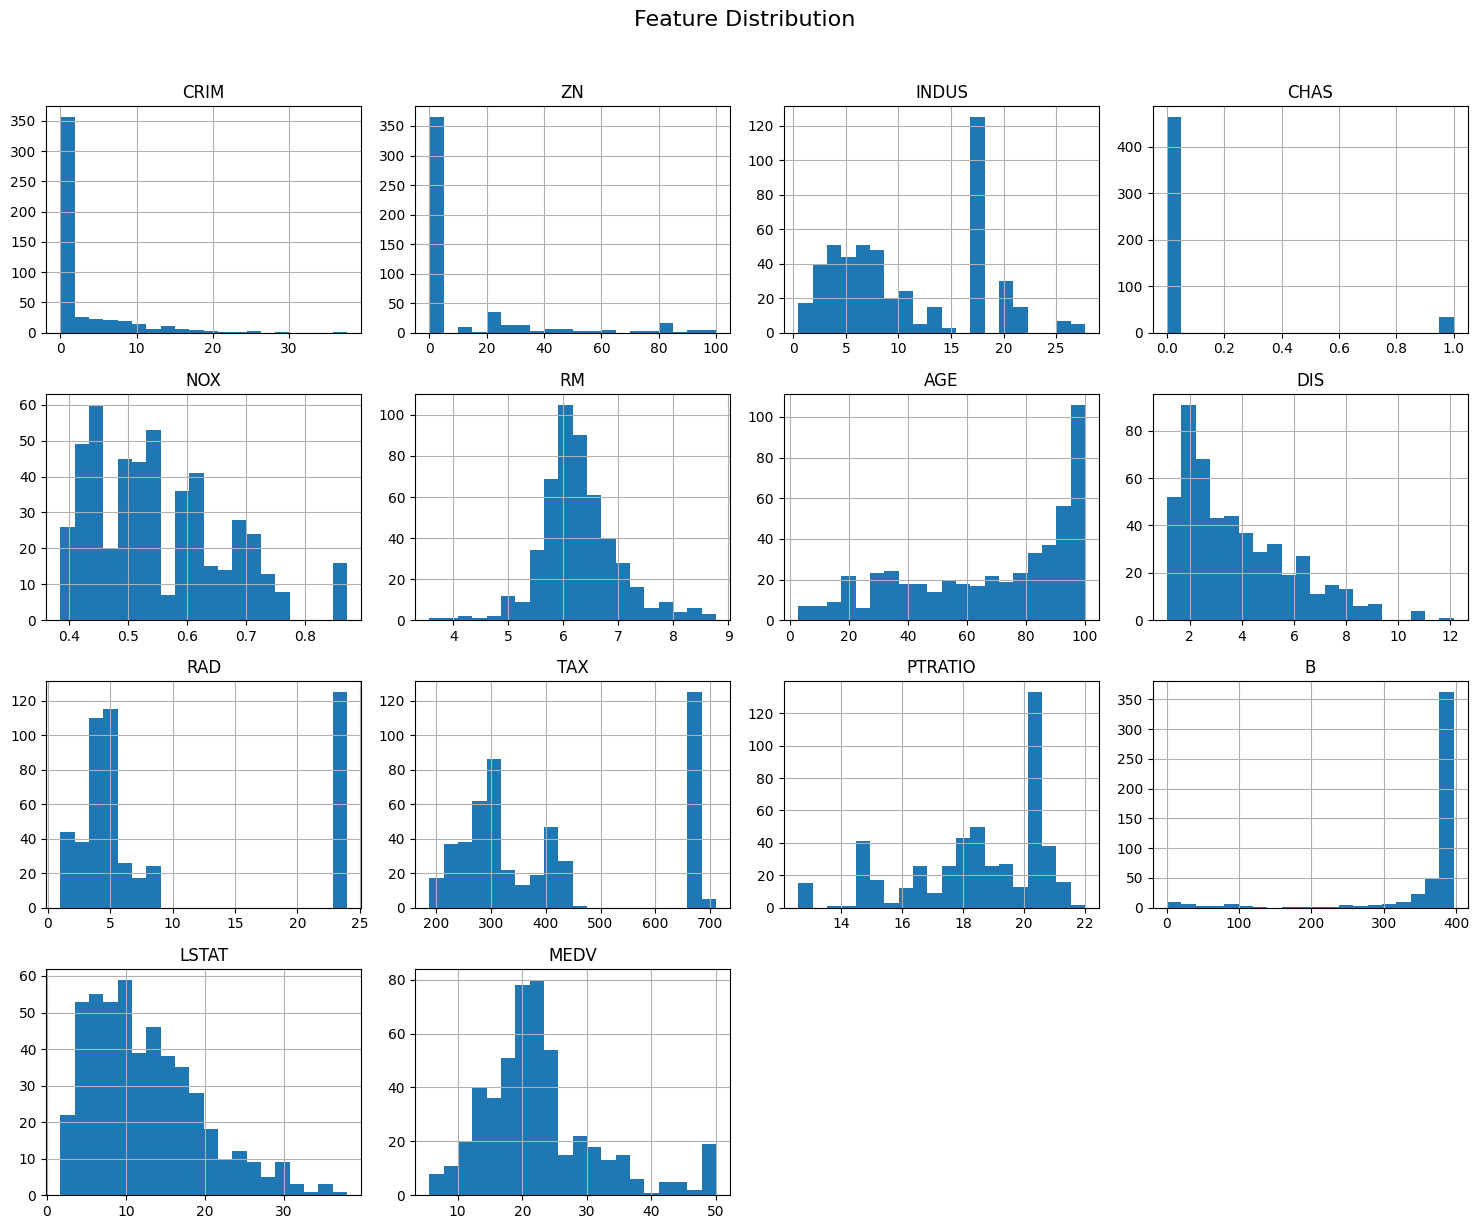

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据集
file_path = 'data\\housing.data'
# 加入列名
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# 读取数据集到DataFrame
data = pd.read_csv(file_path, header=None, delimiter=r"\s+", names=column_names)
# 开始检查数据是否存在缺失值和异常值
description = data.describe()

# 开始处理数据
def data_manage(data):
    # 获取均值和标准差
    column_mean = np.mean(data, axis=0)
    column_std = np.std(data, axis=0)
    
    # 阈值(设置为三倍标准差)
    threshold = 4 * column_std
    
    # 找出异常数据点的索引
    abnormal_index =  np.where(np.abs(data - column_mean) > threshold)[0]
    
    print(f"\n异常的数据所在行:\n\n",data.loc[abnormal_index])
    
    # 将数据有异常的行给删除
    cleaned_data = data.drop(abnormal_index)
    
    return cleaned_data

cleaned_data = data_manage(data)

cleaned_data.hist(figsize=(15,12), bins=20)
plt.suptitle("Feature Distribution", y=1.02, fontsize=16 )
plt.tight_layout()
plt.show()

# 损失函数
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# 梯度下降
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = np.zeros(num_iters)

    for i in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        theta = theta - (alpha / m) * (errors.T.dot(X)).T
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# 预测
def predict(X, theta):
    predictions = X.dot(theta)
    return predictions

X = data.iloc[:, :-1]  # 取出前13列作为特征
y = data.iloc[:, -1]   # 取出最后一列作为目标值

X = np.hstack((np.ones((X.shape[0], 1)), X))  # 添加偏置项

theta = np.zeros(X.shape[1])  # 初始化一个全0的theta向量

alpha = 0.01     # 学习率
num_iters = 1000 # 迭代次数
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters)